In [1]:
import pandas as pd
top50_df = pd.read_csv("top_50_2019_2021.csv", encoding='latin-1')
top50_df.head()

,musicid,trackname,artistname,bpm,energy,danceability,loudness,liveness,valence,acounticness,speechiness,popularity,songyear
0,1,drivers license,Olivia Rodrigo,144,0.431,0.561,-8.810,0.106,0.137,0.768,0.0578,92,2021
1,1,SeÑorita,Shawn Mendes,117,55.000,76.000,-6.000,8.000,75.000,4.000,3.0000,79,2019
2,2,MONTERO (Call Me By Your Name),Lil Nas X,179,0.503,0.593,-6.725,0.405,0.710,0.293,0.2200,90,2021
3,2,China,Anuel AA,105,81.000,79.000,-4.000,8.000,61.000,8.000,9.0000,92,2019
4,3,boyfriend (with Social House),Ariana Grande,190,80.000,40.000,-4.000,16.000,70.000,12.000,46.0000,85,2019


In [2]:
import matplotlib.pyplot as plt
from sklearn import linear_model
import statsmodels.api as sm
from sklearn.preprocessing import StandardScaler, MinMaxScaler

Intercept: 
 82.42608213347121
Coefficients: 
 [ 0.03329208  0.02166768  0.0221955  -0.05891595  0.06617527 -0.06819861
 -0.00457593  0.04901269]
                            OLS Regression Results                            
Dep. Variable:             popularity   R-squared:                       0.090
Model:                            OLS   Adj. R-squared:                  0.010
Method:                 Least Squares   F-statistic:                     1.119
Date:                Wed, 01 Jun 2022   Prob (F-statistic):              0.358
Time:                        07:55:35   Log-Likelihood:                -305.99
No. Observations:                 100   AIC:                             630.0
Df Residuals:                      91   BIC:                             653.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0

C:\Users\mleegan\Anaconda3\envs\mlenv\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


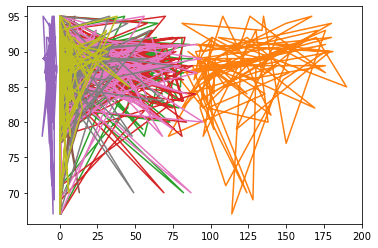

In [8]:
## not scaled

X = top50_df[['bpm', 'energy', 'danceability', 'loudness',
                'liveness', 'valence', 'acounticness', 'speechiness'
                  ]]
Y = top50_df['popularity']

regr = linear_model.LinearRegression()
regr.fit(X,Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X) # adding a constant
 
model = sm.OLS(Y, X).fit()
predictions = model.predict(X) 
 
print_model = model.summary()
print(print_model)

plt.plot(X, Y)
plt.show()

Intercept: 
 87.15
Coefficients: 
 [ 0.99259638  0.72013054  0.80614775 -0.11958865  0.70339834 -2.12994647
 -0.07883421  0.48884567]
                                 OLS Regression Results                                
Dep. Variable:             popularity   R-squared (uncentered):                   0.000
Model:                            OLS   Adj. R-squared (uncentered):             -0.087
Method:                 Least Squares   F-statistic:                           0.003952
Date:                Wed, 01 Jun 2022   Prob (F-statistic):                        1.00
Time:                        07:56:35   Log-Likelihood:                         -588.83
No. Observations:                 100   AIC:                                      1194.
Df Residuals:                      92   BIC:                                      1215.
Df Model:                           8                                                  
Covariance Type:            nonrobust                                     

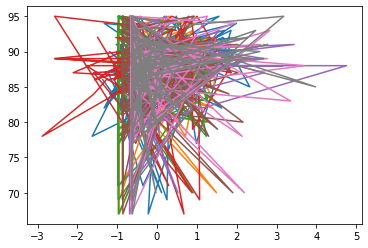

In [9]:
## scaled

X = top50_df[['bpm', 'energy', 'danceability', 'loudness',
                'liveness', 'valence', 'acounticness', 'speechiness'
                  ]]
Y = top50_df['popularity']

X_scaled = StandardScaler().fit_transform(X)

regr = linear_model.LinearRegression()
regr.fit(X_scaled,Y)

print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# with statsmodels
X = sm.add_constant(X_scaled) # adding a constant
 
model = sm.OLS(Y, X_scaled).fit()
predictions = model.predict(X_scaled) 
 
print_model = model.summary()
print(print_model)

plt.plot(X_scaled, Y)
plt.show()